#Dataset Analysis


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suyashgupta1523","key":"9472e17ea5191f33186f18680ed85fbf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

##Dataset 1 : https://www.kaggle.com/datasets/vijaythurimella/customer-support-tickets?resource=download

In [ ]:
! kaggle datasets download -d 'vijaythurimella/customer-support-tickets'

Dataset URL: https://www.kaggle.com/datasets/vijaythurimella/customer-support-tickets
License(s): unknown
  0% 0.00/828k [00:00<?, ?B/s]
100% 828k/828k [00:00<00:00, 26.9MB/s]


In [ ]:
! unzip customer-support-tickets.zip

Archive:  customer-support-tickets.zip
  inflating: customer_support_tickets.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('/content/customer_support_tickets.csv')

In [ ]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [ ]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


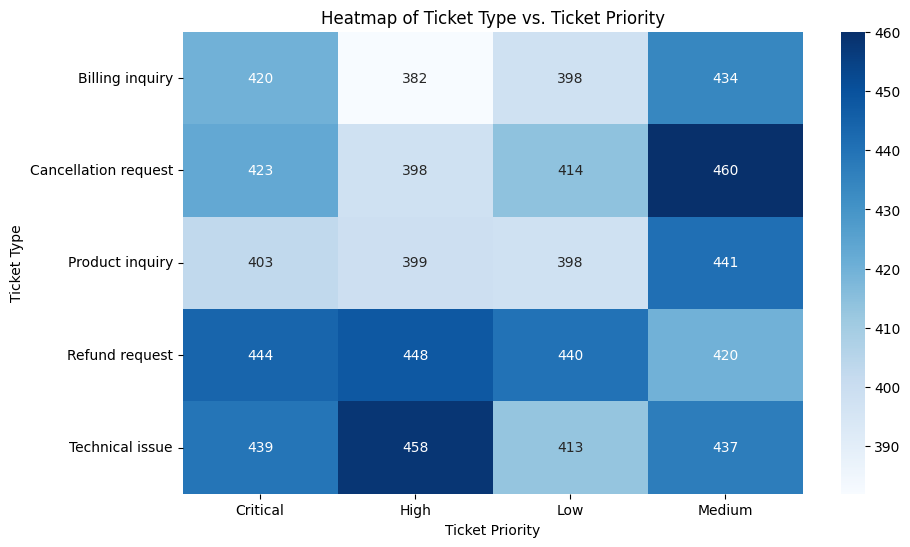

In [ ]:
# prompt: a heatmap between ticket type and ticket priority in a common color

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Ticket Type' and 'Ticket Priority' are columns in your DataFrame 'df'
# Replace 'Ticket Type' and 'Ticket Priority' with actual column names if different

# Calculate the cross-tabulation of 'Ticket Type' and 'Ticket Priority'
ticket_cross = pd.crosstab(df['Ticket Type'], df['Ticket Priority'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ticket_cross, annot=True, fmt="d", cmap="Blues")  # Use a common colormap like 'Blues'
plt.title('Heatmap of Ticket Type vs. Ticket Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Ticket Type')
plt.show()

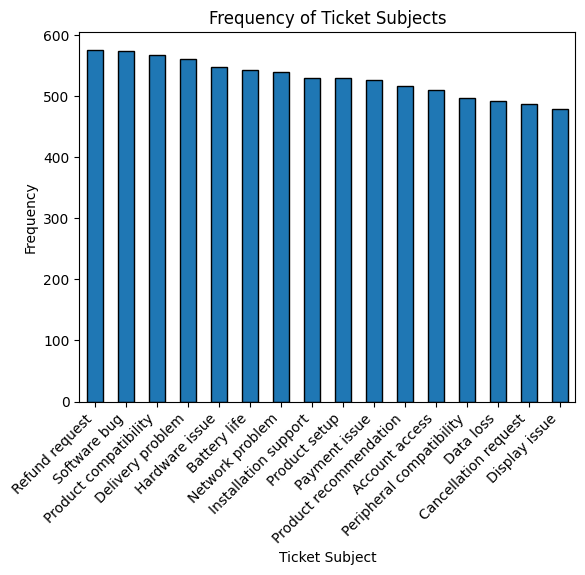

In [ ]:
# @title Frequency of Ticket Subjects

import matplotlib.pyplot as plt

df['Ticket Subject'].value_counts().plot(kind='bar', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ticket Subject')
plt.ylabel('Frequency')
_ = plt.title('Frequency of Ticket Subjects')

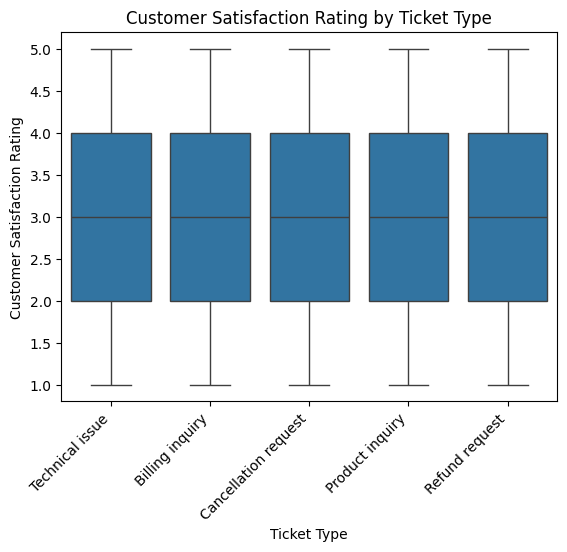

In [ ]:
# @title Customer Satisfaction Rating by Ticket Type

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Ticket Type', y='Customer Satisfaction Rating', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ticket Type')
plt.ylabel('Customer Satisfaction Rating')
_ = plt.title('Customer Satisfaction Rating by Ticket Type')

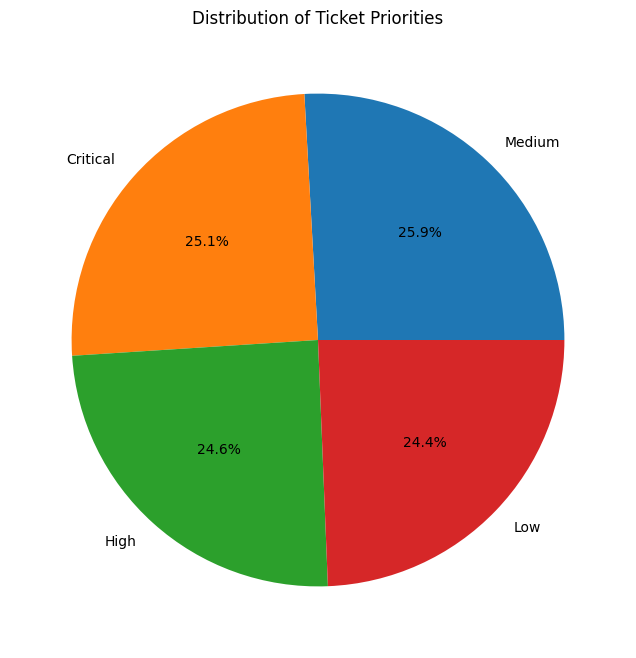

In [ ]:
# @title Distribution of Ticket Priorities

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ticket Priorities')
_ = plt.ylabel('')

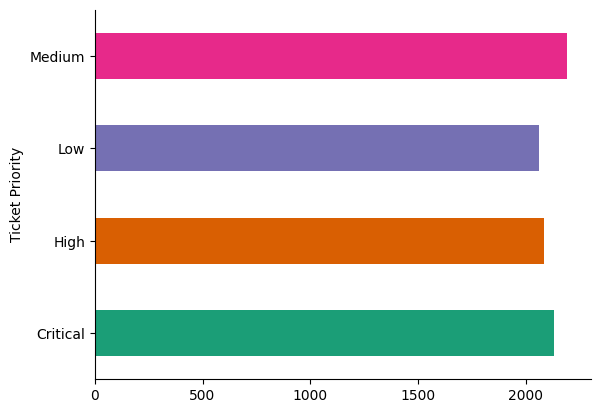

In [ ]:
# @title Ticket Priority

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Ticket Priority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

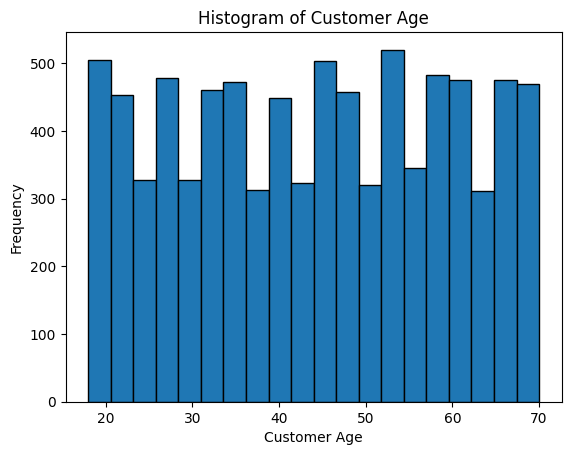

In [ ]:
# prompt: Using dataframe df: histogram of age feature and cheking if it is balanced or not

import matplotlib.pyplot as plt
# Create a histogram of the 'Customer Age' feature.
plt.hist(df['Customer Age'], bins=20, edgecolor='black')  # Adjust the number of bins as needed.
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Age')

# Check for class imbalance by observing the distribution.
# A balanced dataset would have a relatively uniform distribution.
plt.show()


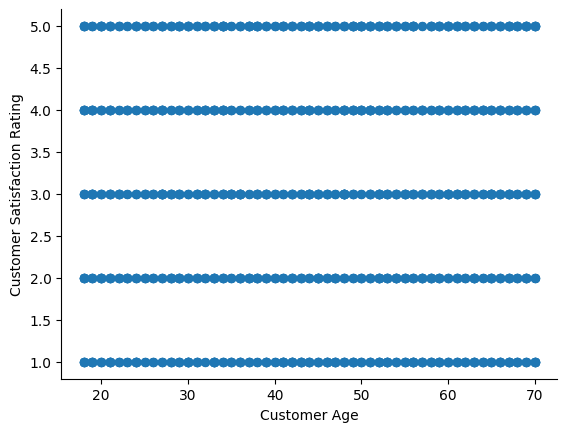

In [ ]:
# Customer Age vs Customer Satisfaction Rating

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Customer Age', y='Customer Satisfaction Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

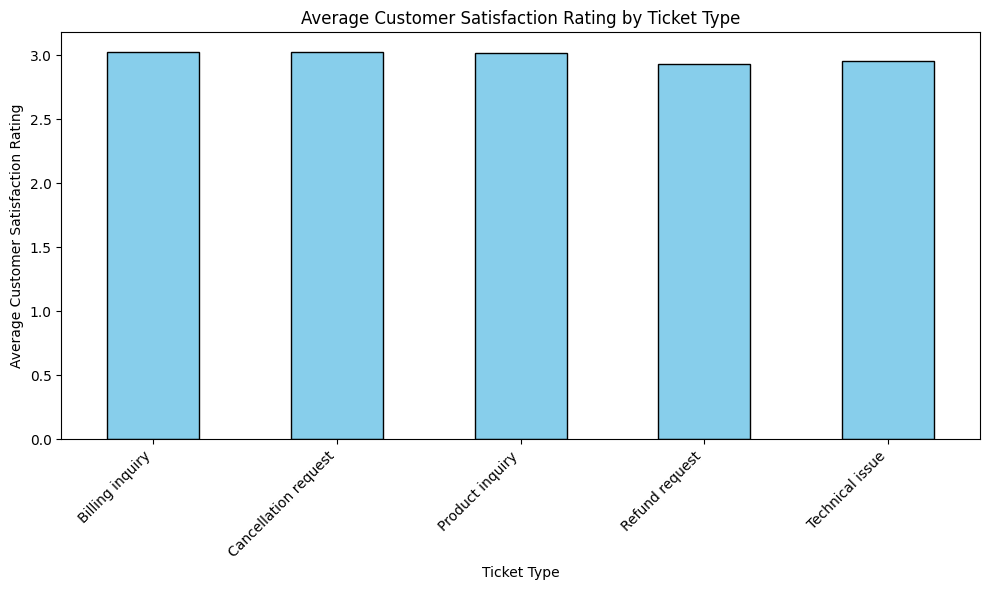

In [ ]:
# prompt: compre customer satisfaction rating with ticket type

# Assuming 'Ticket Type' and 'Customer Satisfaction Rating' are columns in your DataFrame 'df'
# Replace with actual column names if different

# Group data by 'Ticket Type' and calculate the mean customer satisfaction rating for each type
satisfaction_by_type = df.groupby('Ticket Type')['Customer Satisfaction Rating'].mean()

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
satisfaction_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Ticket Type')
plt.ylabel('Average Customer Satisfaction Rating')
plt.title('Average Customer Satisfaction Rating by Ticket Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

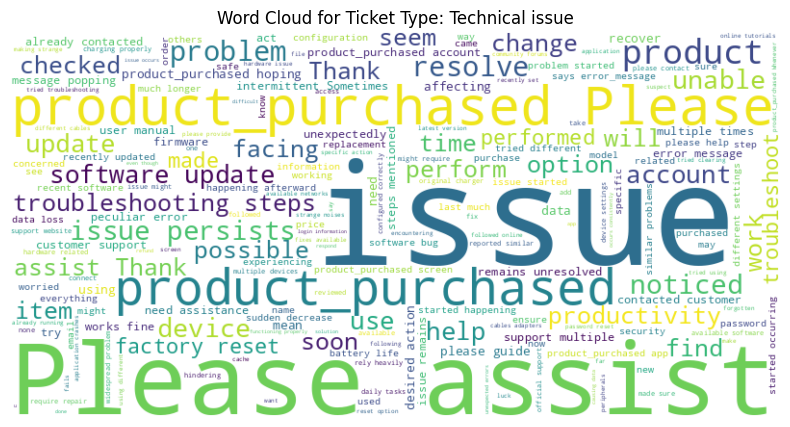

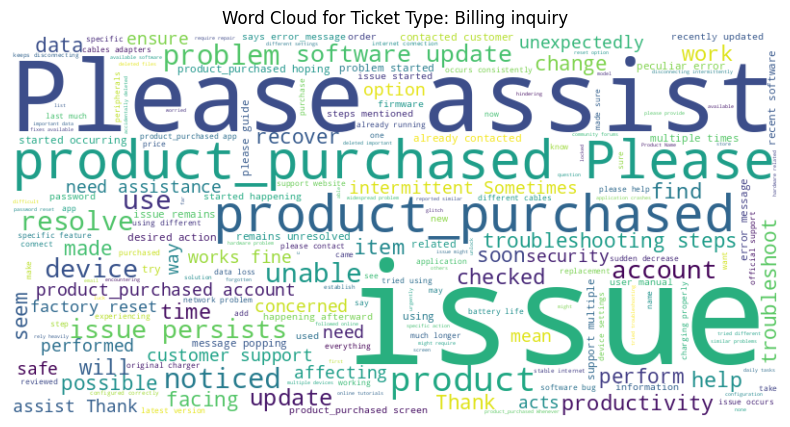

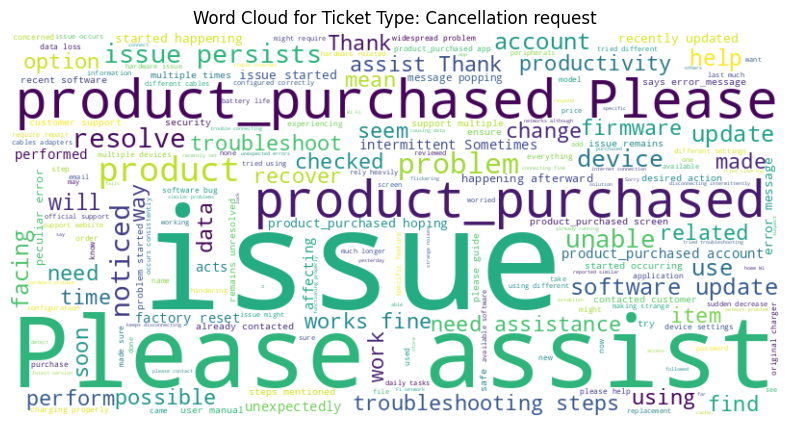

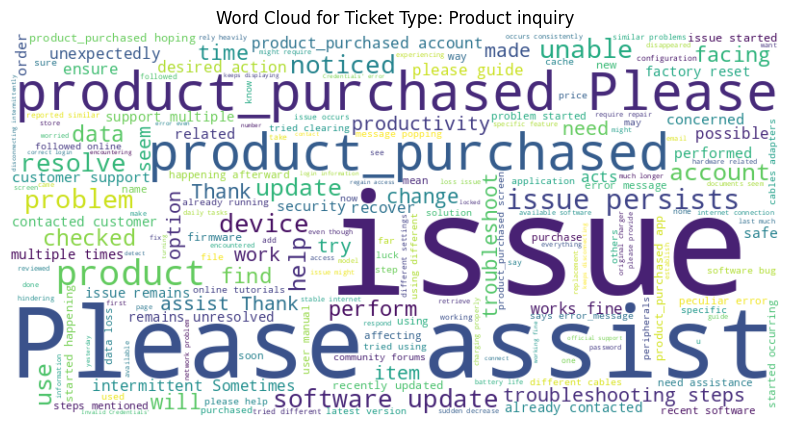

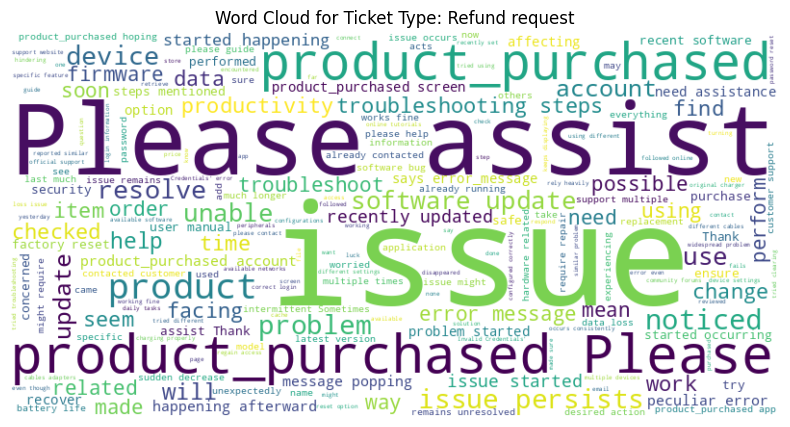

In [ ]:
# prompt: make the word cloud of the ticket description for different unique ticket types, make each one differentiate

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Ticket Type' and 'Ticket Description' are columns in your DataFrame 'df'
# Replace with actual column names if different

# Get unique ticket types
unique_ticket_types = df['Ticket Type'].unique()

# Iterate through each unique ticket type
for ticket_type in unique_ticket_types:
    # Filter the DataFrame for the current ticket type
    subset = df[df['Ticket Type'] == ticket_type]

    # Combine all descriptions for the current ticket type
    text = ' '.join(subset['Ticket Description'].astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Ticket Type: {ticket_type}')
    plt.show()

##Dataset 2 (Endeva):https://www.kaggle.com/code/aniketg11/support-tickets-classification/input

In [ ]:
df = pd.read_csv('all_tickets.csv')

In [ ]:
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [ ]:
df.shape

(48549, 9)

In [ ]:
df.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

In [ ]:
df.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000
mean,0.713115,4.491153,11.614390,32.004634,49.482605,2.506066,3.677460
std,0.452312,1.103556,13.752707,33.602122,22.806100,0.855646,0.591513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,49.000000,3.000000,4.000000
75%,1.000000,5.000000,21.000000,53.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,114.000000,102.000000,3.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

,0
title,712
body,0
ticket_type,0
category,0
sub_category1,0
sub_category2,0
business_service,0
urgency,0
impact,0


In [ ]:
df['ticket_type'].unique()

array([1, 0])

In [ ]:
df['ticket_type'].value_counts()

,count
ticket_type,
1,34621
0,13928


Text(0, 0.5, 'Frequency')

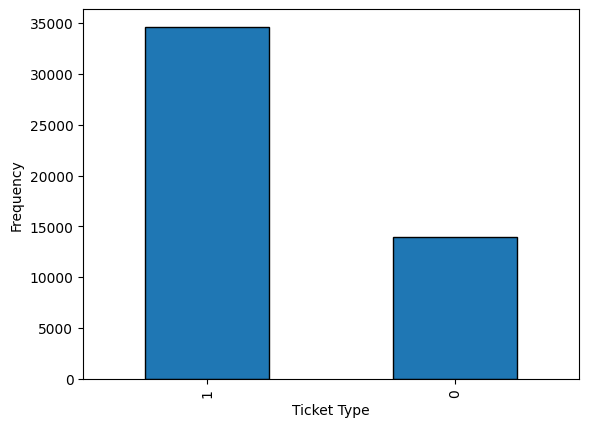

In [ ]:
df['ticket_type'].value_counts().plot(kind='bar', edgecolor='black')
# plt.xticks(rotation=90, ha='left')
plt.xlabel('Ticket Type')
plt.ylabel('Frequency')

,count
category,
4,34061
5,9634
6,2628
7,921
11,612
8,239
9,191
3,137
1,72


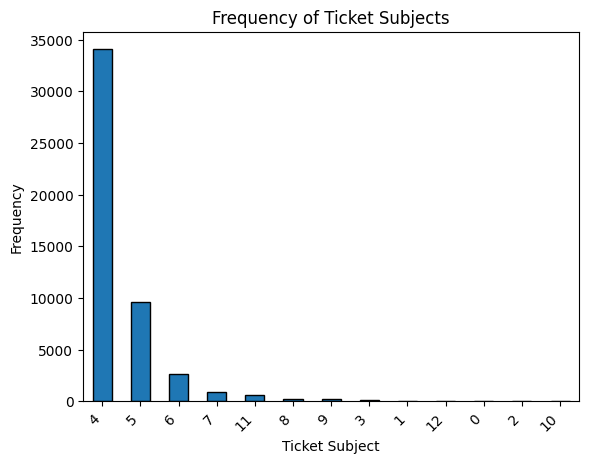

In [ ]:
df['category'].value_counts().plot(kind='bar', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ticket Subject')
plt.ylabel('Frequency')
_ = plt.title('Frequency of Ticket Subjects')
df['category'].value_counts()

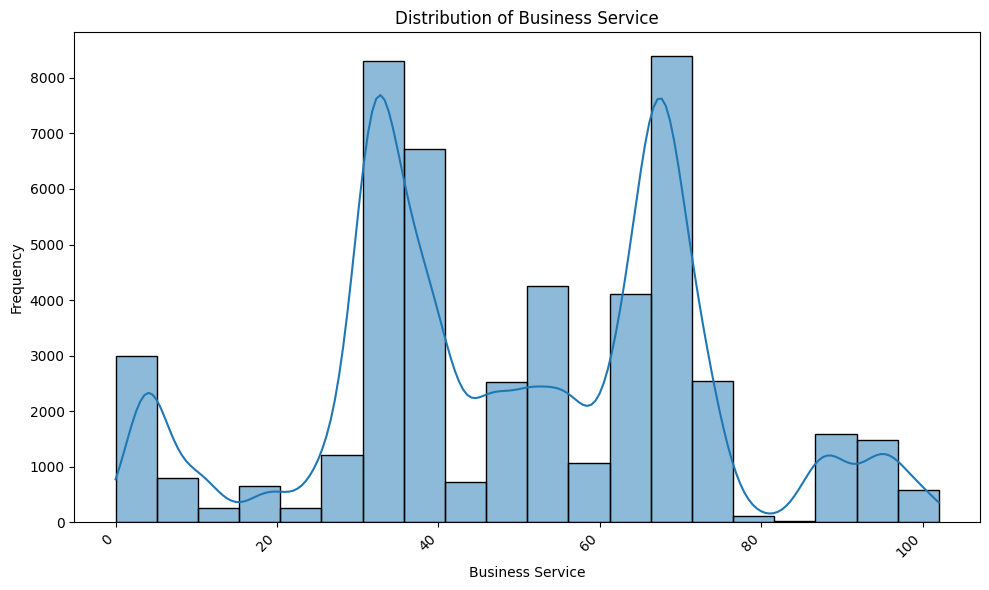

In [ ]:
# prompt: distribution for business_service in bins of data

import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'business_service' is a column in your DataFrame 'df'
# Replace with the actual column name if different

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['business_service'], bins=20,kde=True)  # Adjust number of bins as needed
plt.xlabel('Business Service')
plt.ylabel('Frequency')
plt.title('Distribution of Business Service')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if they are long
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

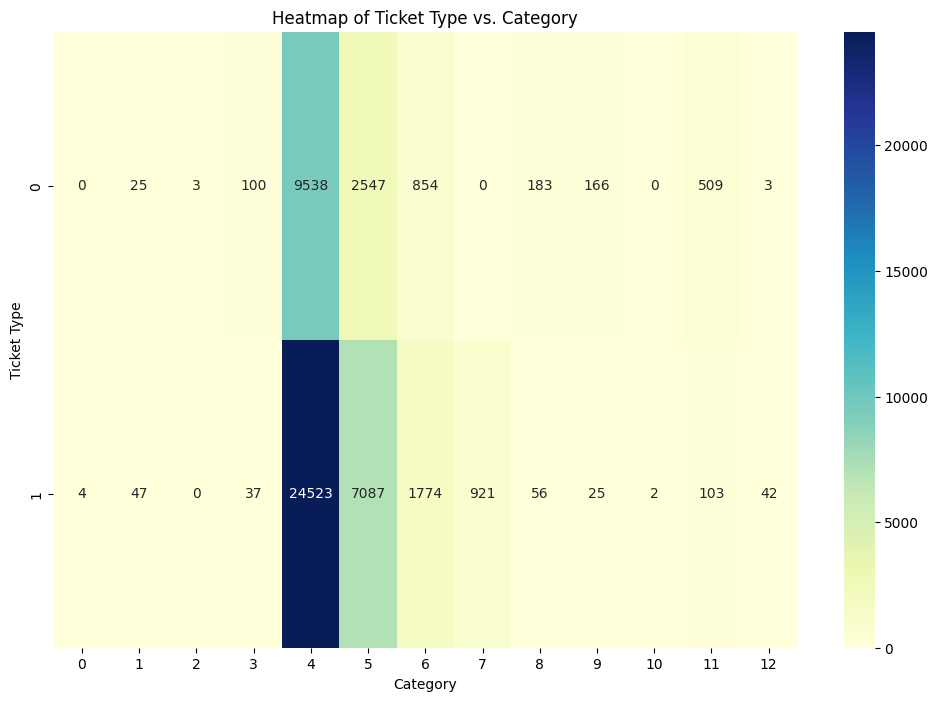

In [ ]:
# prompt: heatmap of ticket type and category

# Assuming 'ticket_type' and 'category' are columns in your DataFrame 'df'
# Replace with actual column names if different

# Calculate the cross-tabulation of 'ticket_type' and 'category'
ticket_category_cross = pd.crosstab(df['ticket_type'], df['category'])

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(ticket_category_cross, annot=True, fmt="d", cmap="YlGnBu")  # Use a colormap like 'YlGnBu'
plt.title('Heatmap of Ticket Type vs. Category')
plt.xlabel('Category')
plt.ylabel('Ticket Type')
plt.show()

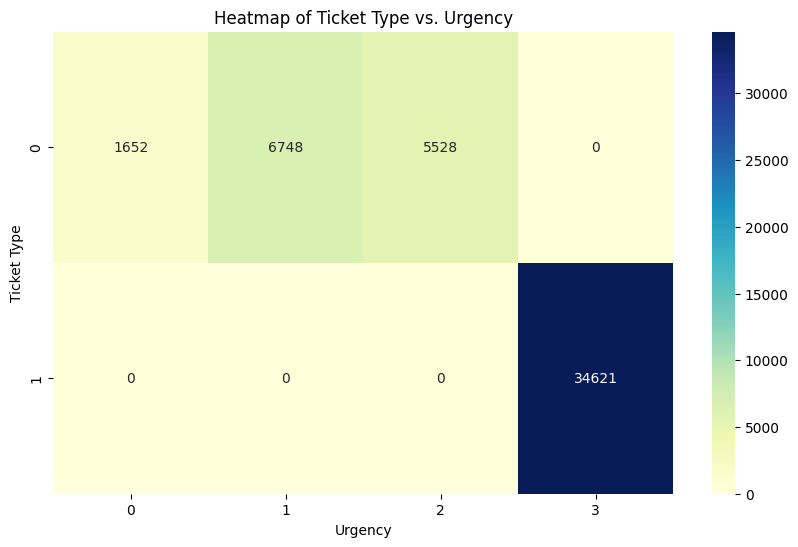

In [ ]:
# prompt: heatmap of ticket type and urgency

# Assuming 'Ticket Type' and 'Urgency' are columns in your DataFrame 'df'
# Replace 'Ticket Type' and 'Urgency' with actual column names if different

# Calculate the cross-tabulation of 'Ticket Type' and 'Urgency'
ticket_urgency_cross = pd.crosstab(df['ticket_type'], df['urgency'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ticket_urgency_cross, annot=True, fmt="d", cmap="YlGnBu")  # Use a suitable colormap
plt.title('Heatmap of Ticket Type vs. Urgency')
plt.xlabel('Urgency')
plt.ylabel('Ticket Type')
plt.show()

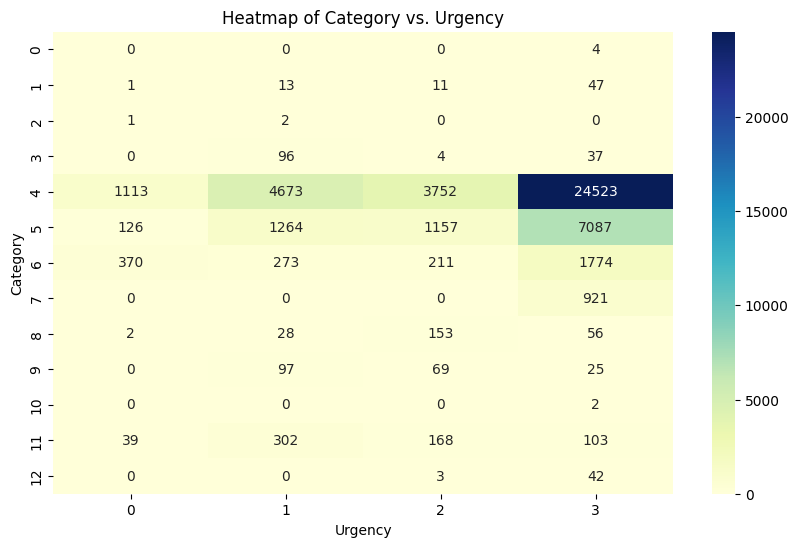

In [ ]:
# prompt: heatmap of urgency and category

# Assuming 'ticket_type' and 'urgency' are columns in your DataFrame 'df'
# Replace with actual column names if different

# Calculate the cross-tabulation of 'ticket_type' and 'urgency'
ticket_urgency_cross = pd.crosstab(df['category'], df['urgency'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ticket_urgency_cross, annot=True, fmt="d", cmap="YlGnBu")  # Use a suitable colormap
plt.title('Heatmap of Category vs. Urgency')
plt.xlabel('Urgency')
plt.ylabel('Category')
plt.show()

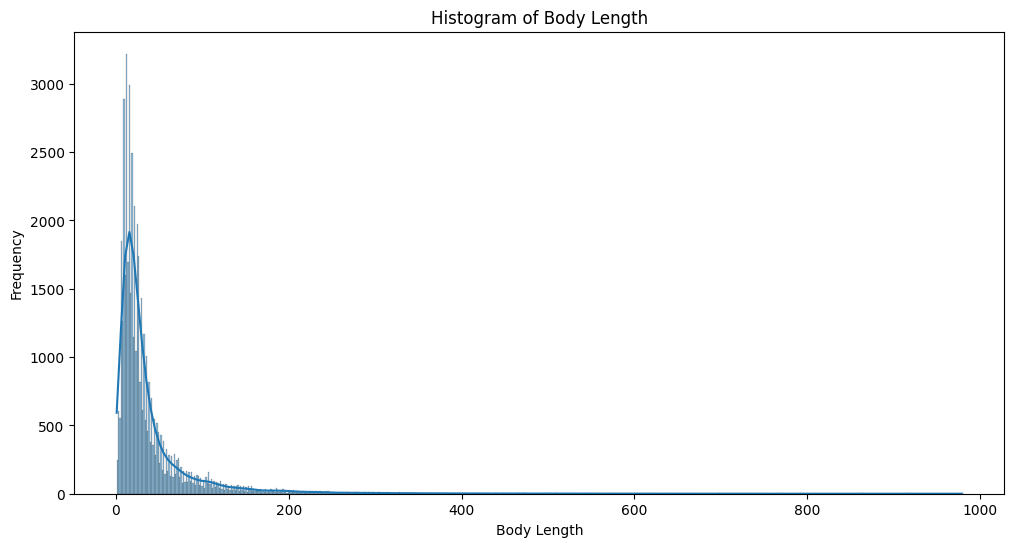

,count
title,
new purchase po,1138
new starter,546
access,524
access to,477
po,182


In [ ]:
# prompt: histogram of length of body in dataset  you need to calculate the length

# Calculate the length of the 'body' column (assuming it exists)
df['body_length'] = df['body'].astype(str).apply(lambda x: len(x.split()))

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['body_length'],kde=True)  # Adjust the number of bins as needed
plt.xlabel('Body Length')
plt.ylabel('Frequency')
plt.title('Histogram of Body Length')
plt.show()

df['body_length'].mean()
df['title'].value_counts()[:5]

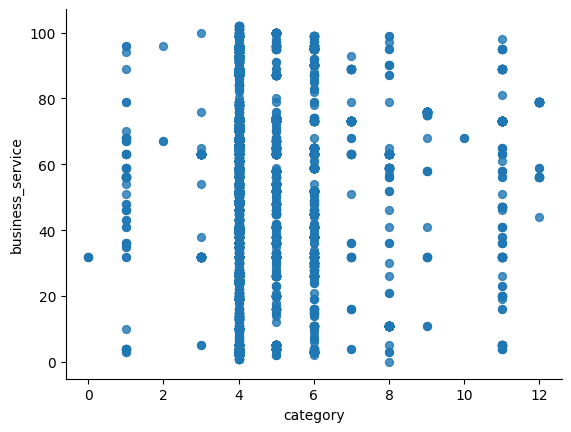

In [ ]:
# @title sub_category2 vs business_service

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='category', y='business_service', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

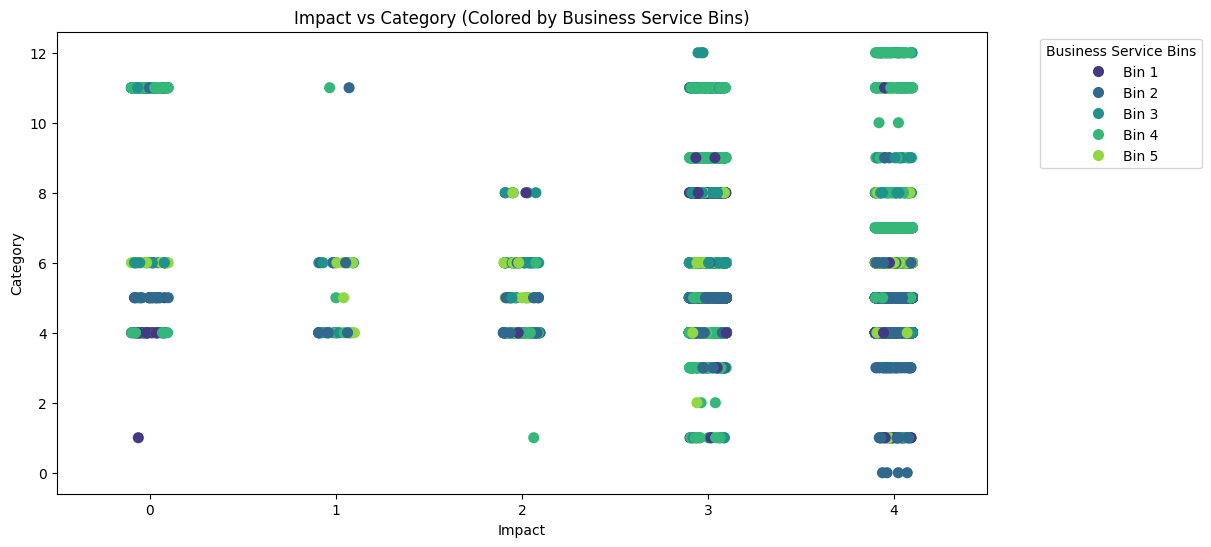

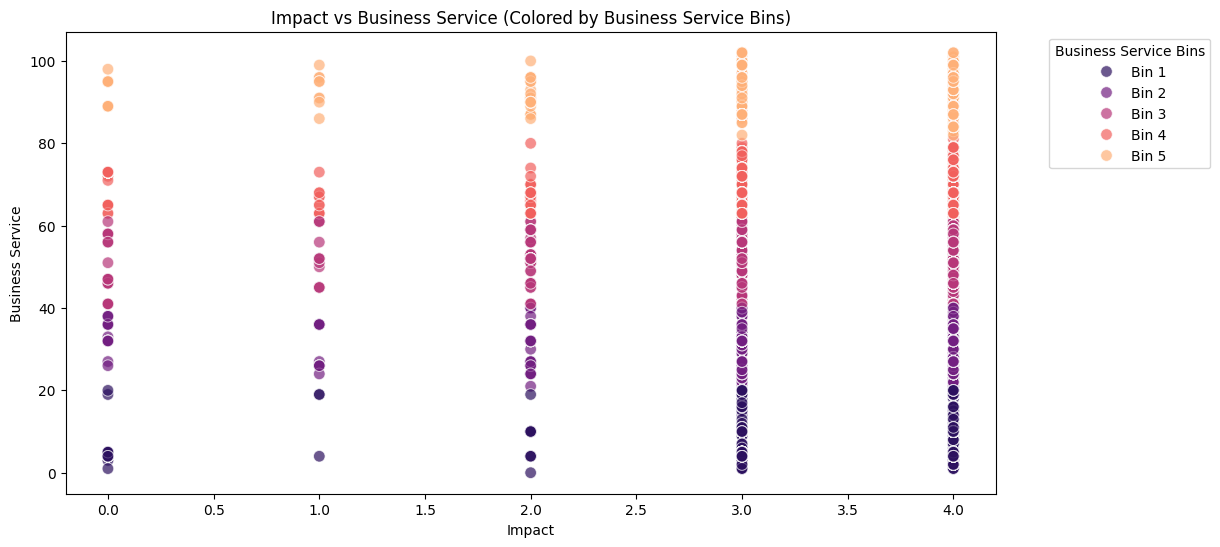

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'impact', 'category', and 'business_service' exist in df
# Remove rows with missing values for clarity
df = df[['impact', 'category', 'business_service']].dropna()

# Step 1: Create bins for 'business_service'
df['business_service_bin'] = pd.cut(df['business_service'], bins=5, labels=[f'Bin {i+1}' for i in range(5)])

# Plot 1: Impact vs Category with Business Service bins as color
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='impact',
    y='category',
    hue='business_service_bin',
    data=df,
    palette='viridis',
    jitter=True,
    size=8
)
plt.title('Impact vs Category (Colored by Business Service Bins)')
plt.xlabel('Impact')
plt.ylabel('Category')
plt.legend(title='Business Service Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 2: Impact vs Business Service with bins as color
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='impact',
    y='business_service',
    hue='business_service_bin',
    data=df,
    palette='magma',
    s=70,
    alpha=0.7
)
plt.title('Impact vs Business Service (Colored by Business Service Bins)')
plt.xlabel('Impact')
plt.ylabel('Business Service')
plt.legend(title='Business Service Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
